# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнил студент гр. 1304 Мамин Роман. Вариант №40.

## Цель работы

Цель данной работы заключается в приобретении знаний о том, как эффективно вычислять одночлены, используя минимальное количество операций, а также в освоении навыков использования компьютерных математических систем для реализации данных алгоритмов.

## Основные теоретические положения

### Метод бинарного SX
Последовательность работы алгоритма:

<ol>
<li> Представим некоторое натуральное число n в двоичной форме: 
    $n = (a_{m}, a_{m-1}, ..., a_{1})_{2}$, где $a_{m} = 1$
<li> Уберем старший бит $a_{m}$
<li> Заменяем: $a_{i} = $SX$,  $если: 
    $a_{i} = $1 <br>
    $a_{i} = $S$, $если:
    $a_{i} = $0 
<li> Выполняем вычисление: <br>
    Если $a[i]$ == $S$: $x = x^2$ <br>
    Если $a[i]$ == $X$: $x = x*x$ <br>
</ol>
Число операций для бинарного метода $SX$ можно записать следующим образом: $\lambda(n) + \nu(n) - 1$

### Бинарный метод возведения справа налево 
Далее представлен алгоритм для возведения в степень $n$ (т. е. вычисления $x^n$) методом справа налево:
<ol>
    <li>На нулевой итерации поставим $N = n; Y = 1; Z = x$</li>
    <li>Если $N$ чётно - переходим на пункт 3, иначе - на пункт 4</li>
    <li>Переприсваиваем $N = \lfloor N/2 \rfloor; Z = Z * Z$; переходим на пункт 2</li>
    <li>Переприсваиваем $N = \lfloor N/2 \rfloor; Y = Z * Y$</li>
    <li>Если $N = 0$, то возвращаем $Y$ как ответ и выходим из алгоритма. Иначе - переприсваиваем $Z = Z * Z$ и переходим на пункт 2</li>
</ol>
Число операций для бинарного метода справа налево можно записать следующим образом: $\lambda(n) + \nu(n)$

### Метод множителей
Последовательность работы алгоритма:
<ol>
    1. Представим степень n как $n = p*q$ где $p$ - минимальный простой множитель n, $q>1$
          Тогда $x^n$ = $ x^{n^{q}}$ <br>
    2. Если $x^n$ является простым числом, то его можно представить как произведение $x^{n-1}$ и $x$, то есть $x^n = x^{n-1} * x$. Если $n = 1$, то $x^n = x$. Если же $x^n$ не является простым числом, то необходимо продолжать разложение, используя тот же самый алгоритм, описанный в шаге 1.
</ol>

### Дерево степеней
Последовательность работы алгоритма построения дерева степеней до $k$-го уровня:
<ol>
    <li>В дереве на самом верхнем уровне имеется только один узел с номером $1$, который является корневым узлом.</li>
    <li>Чтобы построить $k+1$-й уровень дерева, необходимо взять каждый узел $i$ на $k$-м уровне, начиная слева и двигаясь направо, и присоединить к нему узлы с номерами $i+a_{0}, i+a_{1}, ..., i+a_{k-1}$.</li>
    <li>Если узел уже присутствует, то он не будет добавлен повторно.</li>
</ol>

## Постановка задачи

Для выполнения задачи требуется реализовать алгоритмы, которые позволяют вычислять мономы с использованием системы компьютерной алгебры SageMath с минимальным количеством операций. Затем следует провести анализ этих алгоритмов. Полученные результаты могут быть проинтерпретированы в контексте эффективности и скорости работы каждого алгоритма, что позволит выбрать наиболее оптимальный алгоритм для решения конкретной задачи.

## Выполнение работы

### Бинарный метод SX

Функция реализует алгоритм бинарного метода SX для возведения числа `x` в степень `n`. Функция принимает на вход один аргумент `n`, который представляет собой степень, в которую необходимо возвести число `x`.

### Входные параметры:
- `n` - натуральное число, степень в которую нужно возвести число `x`

### Пример использования:
binary_method_SX(13)

### Описание переменных:

- `x` - символьная переменная, которая хранит введенное пользователем число.
- `result` - переменная, которая инициализируется значением `x`.
- `xi` - переменная, которая инициализируется значением `x`.
- `s_or_x_sequence` - переменная, которая используется для хранения последовательности операций `S` и `X`.
- `iteration` - переменная, которая используется для отслеживания количества итераций.
- `n` - аргумент функции, который представляет собой степень, в которую необходимо возвести число `x`.
- `operations` - возвращаемый список операций `S` и `X`.
- `values` - возвращаемый список значений `x_i` после каждой итерации.





In [20]:
def binary_method_SX(n):
    # Создаем переменную x, используя функцию var() из библиотеки SageMath
    x = var('x')
    k = n
    
    # Инициализируем результат и xi значением x
    result = x
    xi = x

    # Инициализируем переменную для последовательности операций
    s_or_x_sequence = ''
    
    # Инициализируем счетчик итераций
    iteration = 1
    
    print("Итерации:")
    # Пока степень n больше 1
    while n > 1:
        # Если n четное число
        if n % 2 == 0 and n!=2:
            # Возводим xi в квадрат
            xi = xi^2
            # Делим n на 2
            n = n // 2
            # Добавляем символ 'S' к последовательности операций
            s_or_x_sequence += 'S'
        # Если n нечетное число
        else:
            # Умножаем xi на x
            xi = xi * x
            # Уменьшаем n на 1
            n = n - 1
            # Добавляем символ 'X' к последовательности операций
            s_or_x_sequence += 'X'
        print(f"{iteration}: {xi} {n}")
        iteration += 1
    print(f"Последователность: {s_or_x_sequence[::-1]}")

In [21]:
n = 37
binary_method_SX(n)

Итерации:
1: x^2 36
2: x^4 18
3: x^8 9
4: x^9 8
5: x^18 4
6: x^36 2
7: x^37 1
Последователность: XSSXSSX


In [22]:
n = 23
binary_method_SX(n)

Итерации:
1: x^2 22
2: x^4 11
3: x^5 10
4: x^10 5
5: x^11 4
6: x^22 2
7: x^23 1
Последователность: XSXSXSX


In [23]:
n = 17
binary_method_SX(n)

Итерации:
1: x^2 16
2: x^4 8
3: x^8 4
4: x^16 2
5: x^17 1
Последователность: XSSSX


Проверим оценку числа операций для данных $n$:<br>

$n = 37 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 3; \lambda(n) + \nu(n) - 1 = 7 \Rightarrow$ Верно<br>
$n = 23 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 4; \nu(n) = 4; \lambda(n) + \nu(n) - 1 = 7 \Rightarrow$ Верно<br>
$n = 17 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 4; \nu(n) = 2; \lambda(n) + \nu(n) - 1 = 5 \Rightarrow$ Верно<br>

Формула для вычисления количества операций корректна.

### Вывод

Реализован алгоритм бинарного метода SX, который позволяет быстро и эффективно вычислять степени числа $x$. В результате проверки работоспособности алгоритма было выявлено, что он действительно работает корректно и выдает правильный результат. Кроме того, благодаря теоретической оценке числа операций, можно заранее узнать, сколько итераций потребуется для вычисления степени числа $x$. В силу простоты реализации и понимания алгоритма, он может быть использован в различных задачах, связанных с вычислением степеней чисел.

### Бинарный метод возведения справа налево

Функция реализует алгоритм право-налево бинарного возведения числа в степень. Функция принимает на вход один аргумент `n`, который представляет собой степень, в которую необходимо возвести число `x`.

### Входные параметры:
- `n` - натуральное число, степень в которую нужно возвести число `x`

### Пример использования:
right_to_left_binary_exponentiation(13)

### Описание переменных

- `x_var` - символьная переменная, которая хранит введенное пользователем число.
- `N` - переменная, которая инициализируется значением `n` и используется для отслеживания степени, в которую необходимо возвести число `x`.
- `Y` - переменная, которая инициализируется значением `1` и используется для хранения результата возведения числа `x` в степень `n`.
- `Z` - переменная, которая инициализируется значением `x_var` и используется для хранения промежуточных результатов при выполнении алгоритма.
- `iteration` - переменная, которая используется для отслеживания количества итераций.


In [24]:
def right_to_left_binary_exponentiation(n):
    # Инициализация символьной переменной x_var
    x_var = var('x')
    
    # Инициализация переменных N, Y и Z
    N = n
    Y = 1
    Z = x_var
    
    # Инициализация переменной-счётчика и печать начальных значений N, Y и Z
    iteration = 0
    print(f"{iteration}\t{N}\t{Y}\t{Z}")
    
    while N != 0:
        if N % 2 == 0:
            # Если N чётное, то делим его на 2 и возводим Z в квадрат
            N = N // 2
            Z = Z * Z
        else:
            # Если N нечётное, то вычитаем 1, делим на 2 и перемножаем Z с Y, а также возведём Z в квадрат, если N != 0
            N = (N - 1) // 2
            Y = Z * Y
            if N != 0:
                Z = Z * Z
        # Увеличение значения переменной-счётчика и печать текущих значений N, Y и Z
        iteration += 1
        print(f"{iteration}\t{N}\t{Y}\t{Z}")

In [25]:
right_to_left_binary_exponentiation(37)

0	37	1	x
1	18	x	x^2
2	9	x	x^4
3	4	x^5	x^8
4	2	x^5	x^16
5	1	x^5	x^32
6	0	x^37	x^32


| № итерации | Значение N | Значение Y | Значение Z   | 
|:----------:|:----------:|:----------:|:----------:  | 
|      0     |     37     |    1       |      $x$     | 
|      1     |     18     |    x       |    $x^2$     | 
|      2     |      9     |    x       |     $x^4$    | 
|      3     |      4     |    $x^5$   |     $x^8$    | 
|      4     |      2     |    $x^5$   |    $x^{16}$  |
|      5     |      1     |    $x^5$|    $x^{32}$  |
|      6     |      0     |    $x^{37}$|    $x^{32}$  |

In [26]:
right_to_left_binary_exponentiation(23)

0	23	1	x
1	11	x	x^2
2	5	x^3	x^4
3	2	x^7	x^8
4	1	x^7	x^16
5	0	x^23	x^16


| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     23     |      1     |     $x$    |
|      1     |     11     |      x     |    $x^2$    |
|      2     |      5     |  $x^3$     |    $x^4$   |
|      3     |      2     |  $x^7$     |    $x^8$   |
|      4     |      1     |    $x^7$   |  $x^{16}$  |
|      5     |      0     |  $x^{23}$  |  $x^{16}$  |

In [27]:
right_to_left_binary_exponentiation(17)

0	17	1	x
1	8	x	x^2
2	4	x	x^4
3	2	x	x^8
4	1	x	x^16
5	0	x^17	x^16



| № итерации | Значение N | Значение Y | Значение Z   | 
|:----------:|:----------:|:----------:|:----------:  | 
|      0     |     17     |    1       |      $x$     | 
|      1     |     8      |    x       |    $x^2$     | 
|      2     |     4      |    x       |     $x^4$    | 
|      3     |      2     |    x       |     $x^8$    | 
|      4     |      1     |    x       |    $x^{16}$  |
|      5     |      0     |    $x^{17}$|    $x^{16}$  |

Можно заметить, что при выполнении алгоритма право-налево бинарного возведения числа в степень, значение переменной $Z$ принимает особый вид. В общем случае, значение $Z$ выражается как $x^{2^{m-2}}$, где $m$ - количество итераций в ходе работы алгоритма (нумерация итераций начинается с 0). Таким образом, зная число итераций $m$, можно определить значение переменной $Z$, которое будет использоваться при вычислении результата возведения числа $x$ в степень $n$.

Проверка результатов полученных на практике с теоретическими:

1)  $𝑛 = 37:𝜆(𝑛)=5;𝜈(𝑛)=1;𝜆(𝑛)+𝜈(𝑛) = 6$ − верно  
2)  $𝑛 = 23:𝜆(𝑛)=4;𝜈(𝑛)=1;𝜆(𝑛)+𝜈(𝑛) = 5$ − верно  
3)  $𝑛 = 17:𝜆(𝑛)=4;𝜈(𝑛)=1;𝜆(𝑛)+𝜈(𝑛) = 5$ − верно  

Результаты совпали, значит формула для оценки операций корректна.

### Вывод
Был реализован алгоритм возведения в степень справа налево с использованием метода бинарного возведения. Результаты работы алгоритма были представлены в виде таблицы. Сравнивая скорость работы алгоритма с другими методами возведения в степень, можно сделать вывод, что он работает быстрее, чем метод последовательного умножения.

Однако, из оценки скорости работы алгоритма можно установить, что в общем случае он работает медленнее алгоритма SX. Поэтому, выбор алгоритма возведения в степень зависит от конкретной задачи и требований к скорости работы.

В целом, алгоритм возведения в степень справа налево имеет ряд преимуществ, таких как простота реализации и более быстрое выполнение, чем метод последовательного умножения. Однако, для больших значений степени и числа может быть более эффективно использовать другие алгоритмы, такие как метод SX.

### 3. Сравнение бинарного метода "SX" и метод возведения справа налево
При сравнении методов возведения числа в степень можно провести оценку числа операций, которые требуются для выполнения алгоритмов. Исходя из такой оценки, можно сделать вывод, что число операций в методе возведения справа налево больше, чем в методе $SX$.

Число итераций в методе возведения справа налево можно оценить как $\lfloor log_{2}(n) \rfloor + 2$, где $n$ - степень, в которую нужно возвести число. В то же время, в методе $SX$ число итераций определяется как $\lambda(n) + \nu(n) - 1$, где $\lambda(n)$ - количество единиц в двоичной записи числа $n$, а $\nu(n)$ - количество блоков из единиц, разделенных нулями в двоичной записи числа $n$.

Таким образом, метод бинарного возведения $SX$ выгоднее метода возведения числа в степень справа налево. Однако, выбор конкретного метода зависит от задачи и требований к скорости работы алгоритма. Важно также учитывать особенности реализации и доступность алгоритмов в используемой системе компьютерной алгебры.

### 4. Метод множителей

Метод множителей для n = 37:

$x^{37} = x^{36}*x$ (1 операция)<br>
$x^{36} = (x^{2})^{18}$ (1 операция)<br>
$x^{18} = (x^2)^9$ (1 операция)<br>
$x^{9} = x*x^8$ (1 операция)<br>
$x^{8} = x^2*x^4$ (1 операция)<br>
$x^{4} = x^2*x^2$ (2 операции)<br>
Итого 7 операций.

Метод множителей для n = 23:

$x^{23} = x^{22}*x$ (1 операция)<br>
$x^{22} = x^{2}*x^{11}$ (1 операция)<br>
$x^{11} = x*x^{10}$ (1 операция)<br>
$x^{10} = x^2*x^{5}$ (1 операция)<br>
$x^{5} = x*x^{4}$ (1 операция)<br>
$x^{4} = x^2*x^2$ (2 операции)<br>
Итого 7 операций.


Метод множителей для n = 17:

$x^{17} = x*x^{16}$ (1 операция)<br>
$x^{16} = x^{2}*x^{8}$ (1 операция)<br>
$x^{8} = x^2*x^{4}$ (1 операция)<br>
$x^{4} = x^2*x^2$ (2 операции)<br>
Итого 5 операций.

### Вывод

Сделан анализ и применен метод множителей. Выяснено, что эффективность метода множителей зависит от количества единиц в бинарной записи числа. Если число содержит много единиц, то метод множителей может оказаться более быстрым, чем бинарный метод SX. Однако, если число содержит мало единиц, то бинарный метод SX может оказаться более эффективным.

### 4. Дерево степеней

Класс Node - класс вершины дерева.
Класс Tree - класс дерева с различными методами-операциями.

In [28]:
class Node:
    """
    Класс узла
    """
    def __init__(self, value=None):
        self.value = value
        self.children = []
        
    def add_child(self, node):
        """
        Добавление дочернего узла
        """
        self.children.append(node)
        
class Tree:
    """
    Класс дерева
    """
    def __init__(self, root_value=None):
        self.root = Node(root_value) if root_value is not None else None
        
    def add_node(self, parent_value, node_value):
        """
        Добавление узла
        """
        new_node = Node(node_value)
        if self.root is None:
            self.root = new_node
            return
        parent_node = self._search_node(parent_value, self.root)
        if parent_node is None:
            print("Parent node not found.")
        else:
            parent_node.add_child(new_node)
    def _search_node(self, value, current_node):
        """
        Поиск узла
        """
        if current_node.value == value:
            return current_node
        for child_node in current_node.children:
            result = self._search_node(value, child_node)
            if result is not None:
                return result
        return None
    
    def find_path(self, start_value, end_value):
        """
        Поиск пути к узлу
        """
        start_node = self._search_node(start_value, self.root)
        end_node = self._search_node(end_value, self.root)
        if start_node is None or end_node is None:
            return None
        path = self._find_path(start_node, end_node)
        return [node.value for node in path] if path is not None else None
    
    def _find_path(self, start_node, end_node):
        if start_node == end_node:
            return [start_node]
        for child_node in start_node.children:
            path = self._find_path(child_node, end_node)
            if path is not None:
                return [start_node] + path
        return None
    
    def find_node(self, value):
        """
        Поиск узла относительно корня
        """
        return self._search_node(value, self.root)
    
def get_nodes_at_level(tree, level):
    """
    Получение всех вершин уровня
    """
    if tree.root is None or level < 0:
        return []
    elif level == 0:
        return [tree.root]
    else:
        return _get_nodes_at_level(tree.root.children, level-1)
    
def _get_nodes_at_level(nodes, level):
    if level == 0:
        return nodes
    next_level_nodes = []
    for node in nodes:
        next_level_nodes.extend(node.children)
    return _get_nodes_at_level(next_level_nodes, level-1)

Функция build_tree строит дерево степеней начиная с 0-го уровня

In [29]:
def build_tree(k):
    """
    Построение дерева степеней k-го уровня
    """
    tree = Tree(1)
    for level in range(k+1):
        edges = get_nodes_at_level(tree, level)
        for edge in edges:
            path = tree.find_path(1, edge.value)
            for parent in path:
                new_edge = edge.value + parent
                if tree.find_node(new_edge) is None:
                    tree.add_node(edge.value, new_edge)
            if tree.find_node(edge.value*2) is None:
                tree.add_node(edge.value, edge.value*2)
    return tree          

Функция visualize_tree визуализирует дерево степеней

In [30]:
from sage.graphs.graph_plot import GraphPlot

def build_parent_dict(root):
    """
    Построение словаря с родителями (для визуализации дерева) 
    """
    parent_dict = {root.value: []}
    _traverse_tree(root, parent_dict)
    return parent_dict

def _traverse_tree(node, parent_dict):
    for child_node in node.children:
        parent_dict[child_node.value] = [node.value]
        _traverse_tree(child_node, parent_dict)

def visualize_tree(tree, node=None):
    """
    Визуализация дерева
    """
    tree_map = build_parent_dict(tree.root)
    graph = Graph(tree_map)
    if tree.find_node(node) is None:
        node = 1
    path = tree.find_path(1, node)
    tuple_way = []
    for i in range(len(path)-1):
        tuple_way.append((path[i], path[i+1]))
    P = graph.plot(layout = 'tree', tree_root = 1, vertex_color = 'lightblue', by_component = True, edge_colors = {'red': tuple_way})
    P.show()
    return graph
    
def _add_node_to_graph(graph, node_map, node):
    node_map[node] = graph.add_vertex(str(node.value))
    for child_node in node.children:
        child_vertex = node_map.get(child_node)
        if child_vertex is None:
            child_vertex = _add_node_to_graph(graph, node_map, child_node)
        graph.add_edge(node_map[node], child_vertex)
    return node_map[node]

Протестируем методы, построив дерево до 4 уровня и получив путь до элемента 9

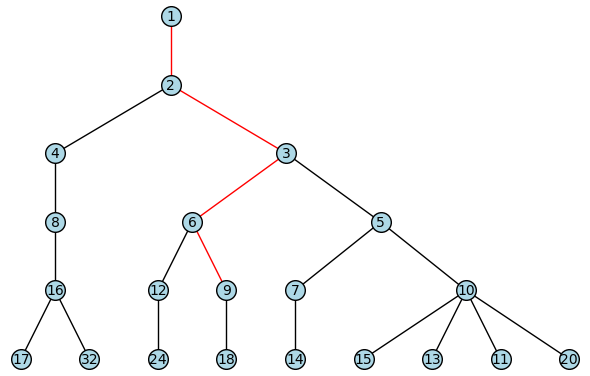

Graph on 21 vertices (use the .plot() method to plot)

In [31]:
tree = build_tree(4)

visualize_tree(tree, 9)

Протестируем методы, построив дерево до 5 уровня и получив путь до элемента 8

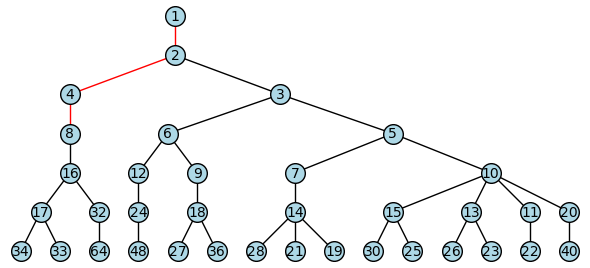

Graph on 36 vertices (use the .plot() method to plot)

In [32]:
tree = build_tree(5)

visualize_tree(tree, 8)

Сравним методы дерева степеней и SX<br>

In [33]:
val = 37
print("Итераций в дереве степеней", len(build_tree(7).find_path(1, val))-1)
print("Итераций в SX методе", floor(log(val, 2)) + bin(val)[2:].count('1') - 1)

Итераций в дереве степеней 7
Итераций в SX методе 7


In [34]:
val = 9
print("Итераций в дереве степеней", len(build_tree(5).find_path(1, val))-1)
print("Итераций в SX методе", floor(log(val, 2)) + bin(val)[2:].count('1') - 1)

Итераций в дереве степеней 4
Итераций в SX методе 4


In [35]:
val = 15
print("Итераций в дереве степеней", len(build_tree(5).find_path(1, val))-1)
print("Итераций в SX методе", floor(log(val, 2)) + bin(val)[2:].count('1') - 1)

Итераций в дереве степеней 5
Итераций в SX методе 6


### Вывод
Был разработан метод дерева степеней, который позволяет построить дерево для получения степеней с наименьшим количеством шагов до определенного уровня n. С помощью Sage был построен график дерева, где цветом был отмечен путь от искомой вершины до корня, используя заданные параметры уровня и искомой степени. Было проверено, что метод степеней не приводит к большему количеству операций, чем метод SX.
Использование дерева степеней имеет преимущество в том, что после построения дерева до заданного уровня можно быстро найти любую степень, не превышающую этот уровень. Это может быть полезно в различных вычислительных задачах, включая криптографию, математические моделирования и другие области.
Однако следует отметить, что метод дерева степеней не всегда является наилучшим выбором для поиска степеней. В некоторых случаях может быть эффективнее использовать другие методы, такие как метод множителей или метод малых шагов. Все зависит от конкретной задачи и параметров.

## Выводы

В результате данного исследования были получены обширные знания о работе различных алгоритмов, предназначенных для вычисления мономов с использованием минимального числа операций. Также был освоен навык применения систем компьютерной математики для эффективной реализации и анализа данных алгоритмов.

В ходе исследования были успешно реализованы и проанализированы такие методы, как бинарный метод SX, метод справа-налево, метод множителей и метод степеней. Каждый из данных методов был сопоставлен друг с другом с точки зрения количества необходимых итераций для достижения результата. Кроме того, была проведена теоретическая оценка сложности каждого из алгоритмов, что позволило определить их эффективность и применимость в различных ситуациях.